<a href="https://colab.research.google.com/github/RuthKassahun/Skin-Lesion-Classification/blob/main/hair_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import numpy as np
import os
from pylab import *

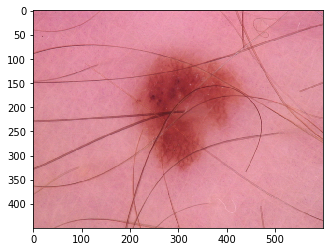

In [29]:
src = cv2.imread('/content/nev00053.jpg')
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB), interpolation='nearest')

In [31]:
kernel = cv2.getStructuringElement(1,(17,17))
grayScale = cv2.cvtColor( src, cv2.COLOR_RGB2GRAY ) #1 Convert the original image to grayscale
blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel) #2 Perform the blackHat filtering on the gray

In [32]:
ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY) # intensify the hair countours in preparation for the inpainting algorithm
dst = cv2.inpaint(src,thresh2,1,cv2.INPAINT_TELEA) # inpaint the original image depending on the mask


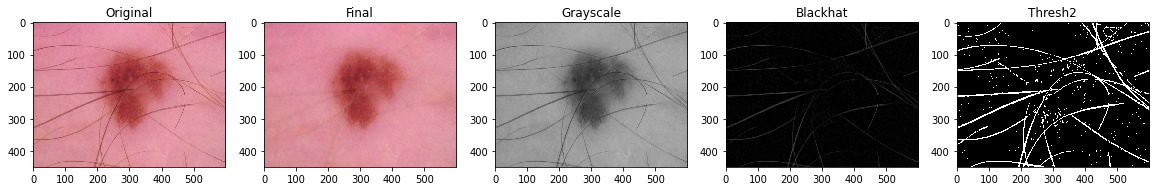

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(1,5,1).set_title('Original')
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.subplot(1,5,3).set_title('Grayscale')
plt.imshow(cv2.cvtColor(grayScale, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.subplot(1,5,4).set_title('Blackhat')
plt.imshow(cv2.cvtColor(blackhat, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.subplot(1,5,5).set_title('Thresh2')
plt.imshow(cv2.cvtColor(thresh2, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.subplot(1,5,2).set_title('Final')
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB), interpolation='nearest')